In [2]:
# Task 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
# Task 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("Housing.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [6]:
X = df.drop("price", axis=1)
y = df["price"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression R2 Score:", lr_r2)

Linear Regression R2 Score: 0.6529242642153184


In [9]:
#Train Random Forest Model
# Random Forest Model

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest R2 Score:", rf_r2)

Random Forest R2 Score: 0.611918531405699


In [10]:
#Compare Results
print("Model Comparison")
print("------------------")
print("Linear Regression R2:", lr_r2)

Model Comparison
------------------
Linear Regression R2: 0.6529242642153184


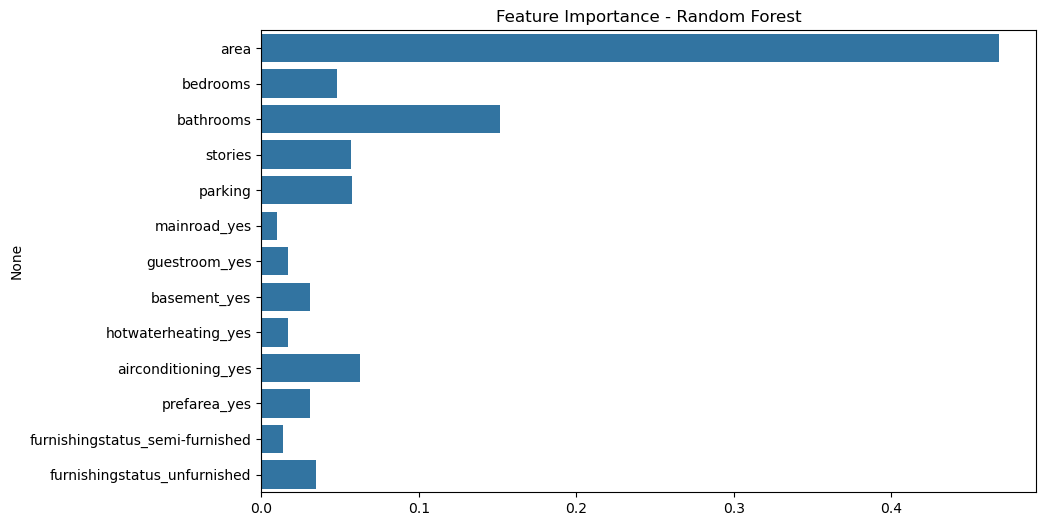

In [11]:
#Feature Importance Visualization
# Feature Importance

importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [13]:
!pip install xgboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.6/101.7 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 2.4/101.7 MB 3.4 MB/s eta 0:00:30
   - -------------------------------------- 3.4/101.7 MB 3.7 MB/s eta 0:00:27
   - -------------------------------------- 4.2/101.7 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 5.2/101.7 MB 4.0 MB/s eta 0:00:25
   -- ------------------------------------- 6.3/101.7 MB 4.1 MB/s eta 0:00:24
   -- ------------------------------------- 7.3/101.7 MB 4.2 MB/s eta 0:00:23
   --- ------------------------------------ 8.7/101.7 MB 4.4 MB/s eta 0:00:22
   ---- ----------------------------------- 10.2/101.7 MB 4.3 MB/s eta 0:00:22
   ---- ----------------------------------- 11.3/101.7 MB 4.4 MB/s eta 0:00:2

In [14]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost R2 Score:", xgb_r2)

XGBoost R2 Score: 0.5850309133529663
